In [ ]:
import pandas as pd #estadística
import numpy as np #cuentas matematicas
import matplotlib.pyplot as plt #graficas
import seaborn as sns

# Cargar archivo CSV
df = pd.read_csv("Casos_de_tuberculosis_pulmonar_20250804.csv")

# Información básica
print("Información del dataset")
print(df.info())
print("Primeras filas del dataset")
print(df.head())
print("Resumen estadístico del dataset")
print(df.describe()) #Resumen estadística

Información del dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295 entries, 0 to 294
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CODIGO EVENTO               295 non-null    int64  
 1   SEMANA                      295 non-null    int64  
 2   AÑO                         295 non-null    int64  
 3   EDAD                        295 non-null    int64  
 4   UNIDAD MEDIDA EDAD          295 non-null    object 
 5   GENERO                      295 non-null    object 
 6   TIPO SEGURIDAD SOCIAL       295 non-null    object 
 7   NOMBRE EVENTO               295 non-null    object 
 8   DEPARTAMENTO DE RESIDENCIA  295 non-null    object 
 9   MUNICIPIO DE RESIDENCIA     295 non-null    object 
 10  ESTRATO                     293 non-null    float64
 11  NACIONALIDAD                295 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 27.8+ KB
None
Prime


Valores faltantes por columna:
CODIGO EVENTO                 0
SEMANA                        0
AÑO                           0
EDAD                          0
UNIDAD MEDIDA EDAD            0
GENERO                        0
TIPO SEGURIDAD SOCIAL         0
NOMBRE EVENTO                 0
DEPARTAMENTO DE RESIDENCIA    0
MUNICIPIO DE RESIDENCIA       0
ESTRATO                       2
NACIONALIDAD                  0
dtype: int64


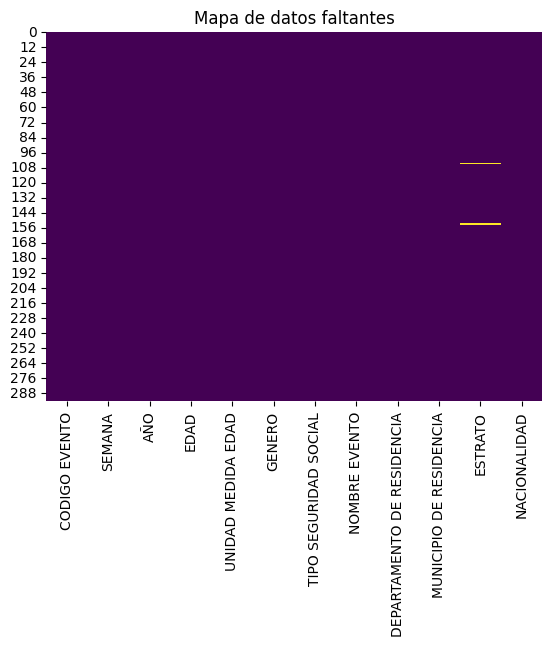

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df.isnull().sum())

# Visualización de nulos
sns.heatmap(df.isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()

In [ ]:
df_filtrado = df.copy() # Assuming you want to work on a copy of the original dataframe

df_filtrado_columnas=["GENERO","MUNICIPIO DE RESIDENCIA","EDAD","AÑO","SEMANA","NACIONALIDAD"]
print(df_filtrado[df_filtrado_columnas].columns)
print("\nInformación del subset dataset")
print(df_filtrado[df_filtrado_columnas].info)
print("\nPrimeras del subset dataset")
print(df_filtrado[df_filtrado_columnas].head)

Index(['GENERO', 'MUNICIPIO DE RESIDENCIA', 'EDAD', 'AÑO', 'SEMANA',
       'NACIONALIDAD'],
      dtype='object')

Información del subset dataset
<bound method DataFrame.info of         GENERO MUNICIPIO DE RESIDENCIA  EDAD   AÑO  SEMANA NACIONALIDAD
0     FEMENINO                 PEREIRA    64  2022      51     COLOMBIA
1     FEMENINO                 PEREIRA    67  2022       6     COLOMBIA
2     FEMENINO                 PEREIRA    42  2022      31     COLOMBIA
3     FEMENINO                 PEREIRA    62  2022       5     COLOMBIA
4     FEMENINO                 PEREIRA    63  2022       3     COLOMBIA
..         ...                     ...   ...   ...     ...          ...
290  MASCULINO                 PEREIRA    39  2022      38     COLOMBIA
291  MASCULINO                 PEREIRA    21  2022      18     COLOMBIA
292  MASCULINO                 PEREIRA    78  2022      18     COLOMBIA
293  MASCULINO                 PEREIRA    71  2022      21     COLOMBIA
294  MASCULINO               


Valores faltantes por columna:
GENERO                     0
MUNICIPIO DE RESIDENCIA    0
EDAD                       0
AÑO                        0
SEMANA                     0
NACIONALIDAD               0
dtype: int64


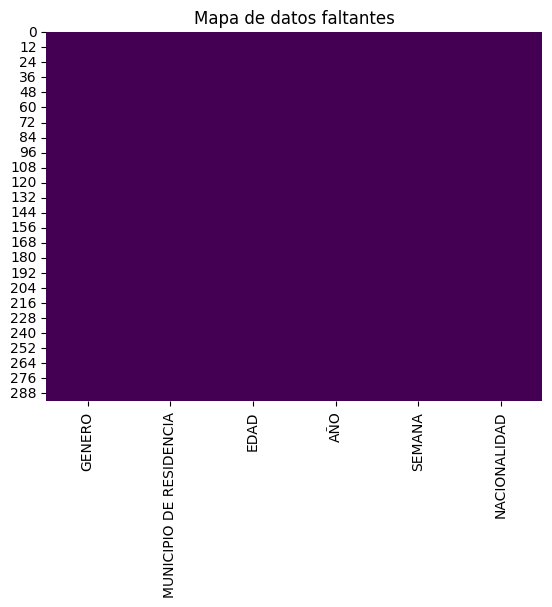

In [ ]:
# Valores faltantes
print("\nValores faltantes por columna:")
print(df_filtrado[df_filtrado_columnas].isnull().sum())

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df_filtrado[df_filtrado_columnas].isnull(), cbar=False, cmap="viridis")
plt.title("Mapa de datos faltantes")
plt.show()


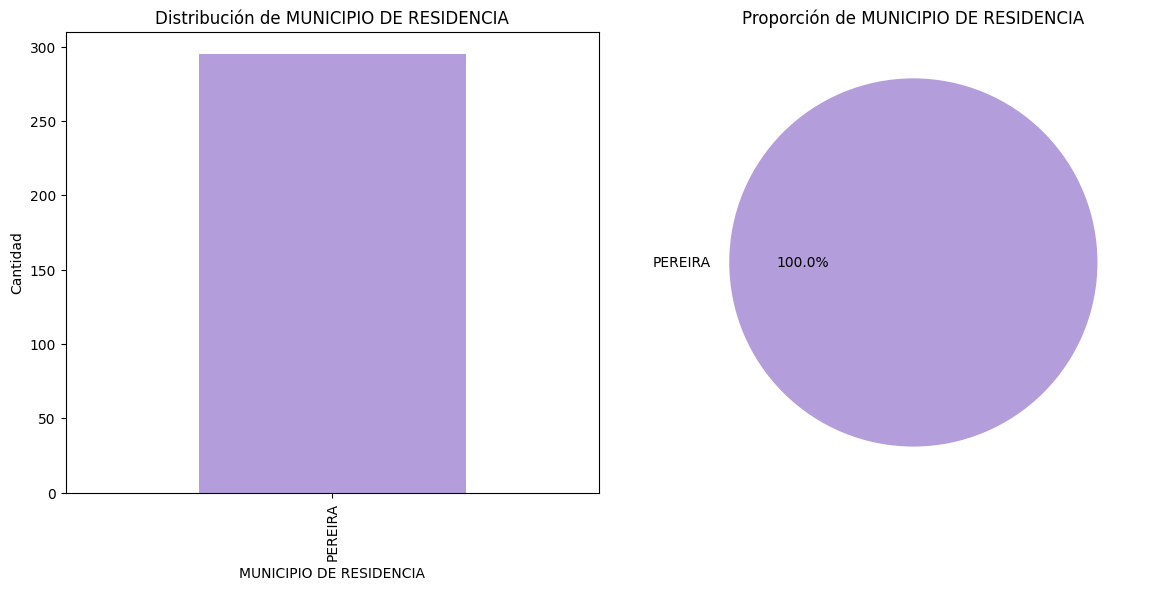

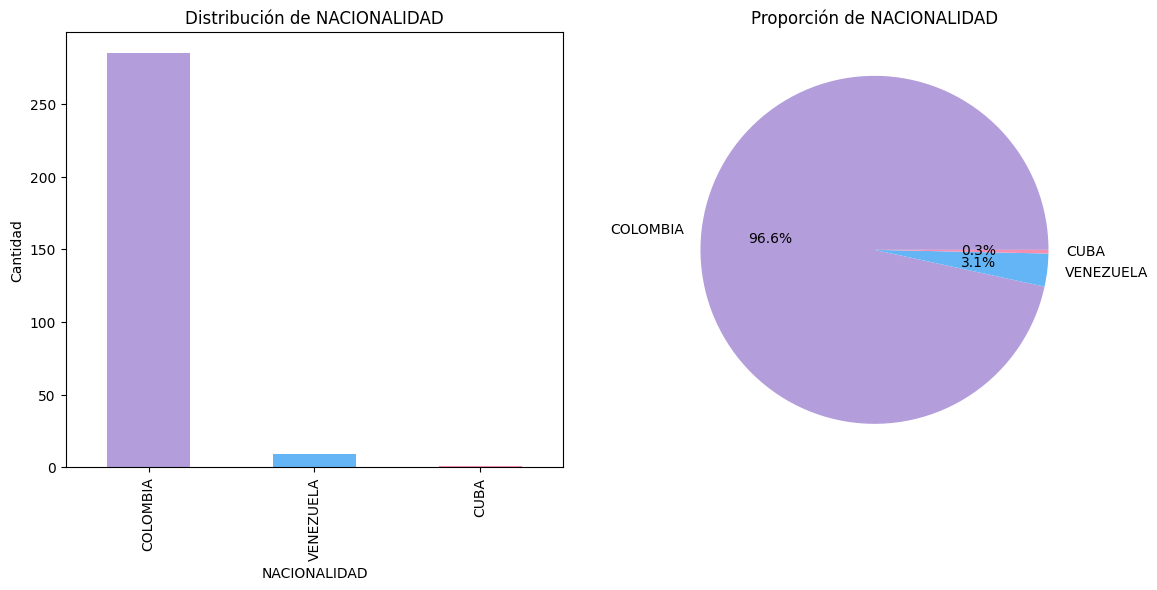

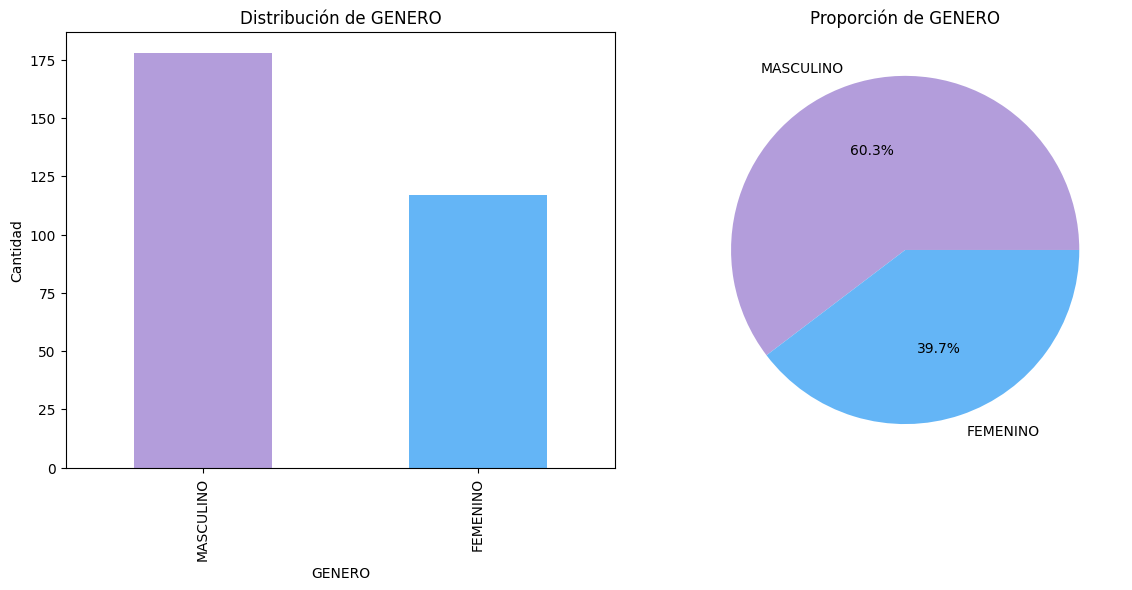

In [ ]:
import matplotlib.pyplot as plt

# Paleta personalizada: lila, azul, rosado
colores_personalizados = ['#B39DDB', '#64B5F6', '#F48FB1']

categorical_cols = ['MUNICIPIO DE RESIDENCIA', 'NACIONALIDAD', 'GENERO']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))

    # Bar chart
    plt.subplot(1, 2, 1)
    df[col].value_counts().plot(kind='bar', color=colores_personalizados)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Cantidad')
    plt.xticks(rotation=90)

    # Pie chart
    plt.subplot(1, 2, 2)
    df[col].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=colores_personalizados)
    plt.title(f'Proporción de {col}')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()


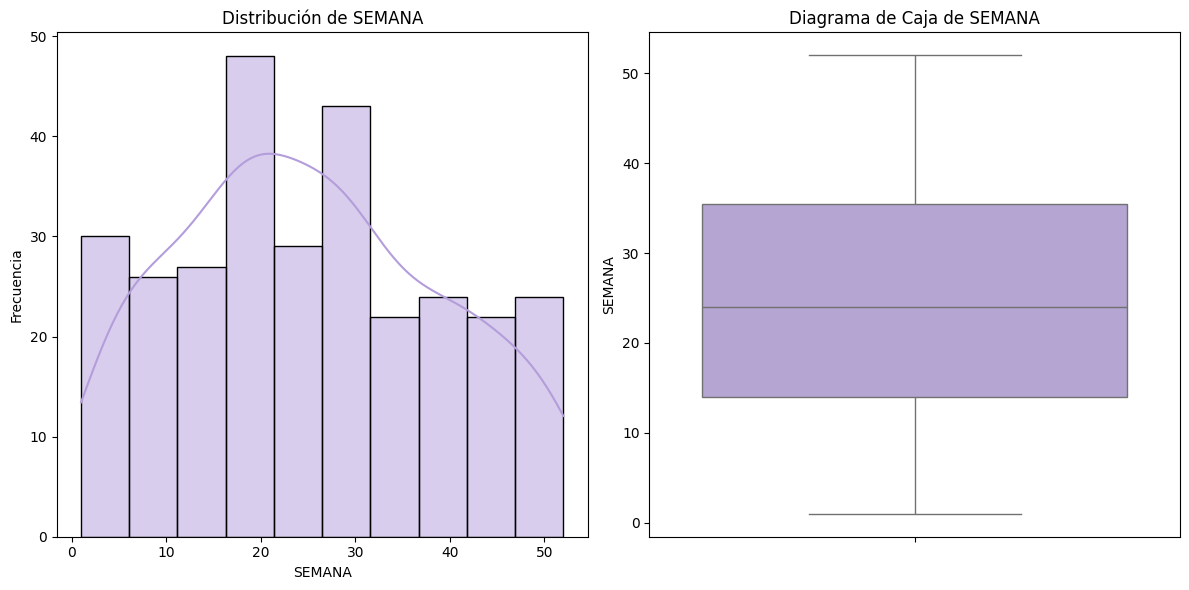

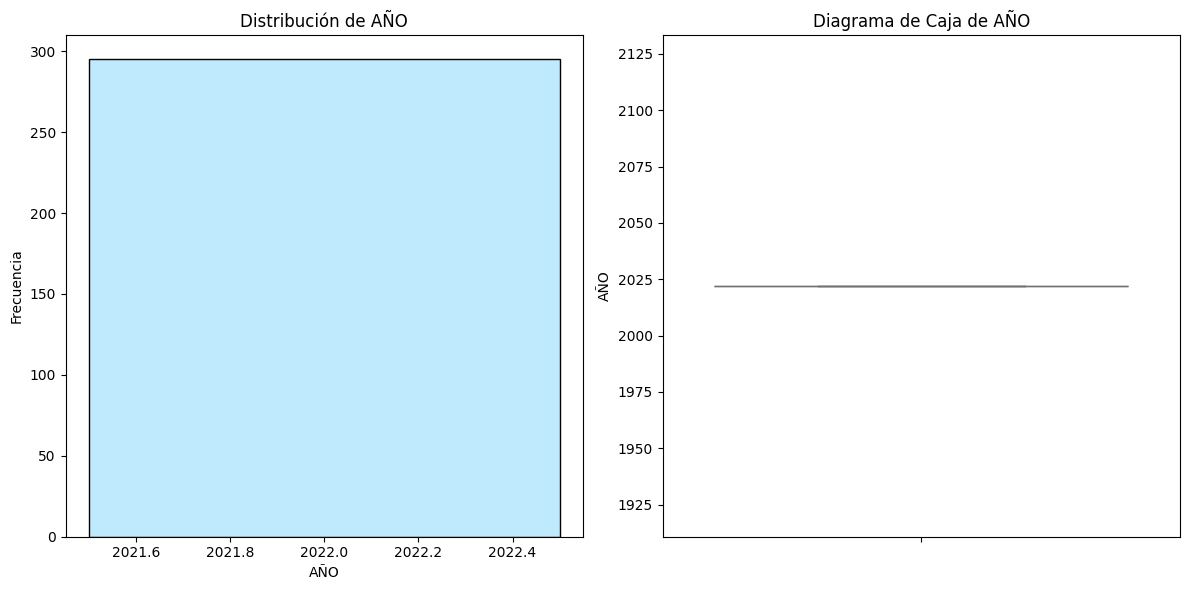

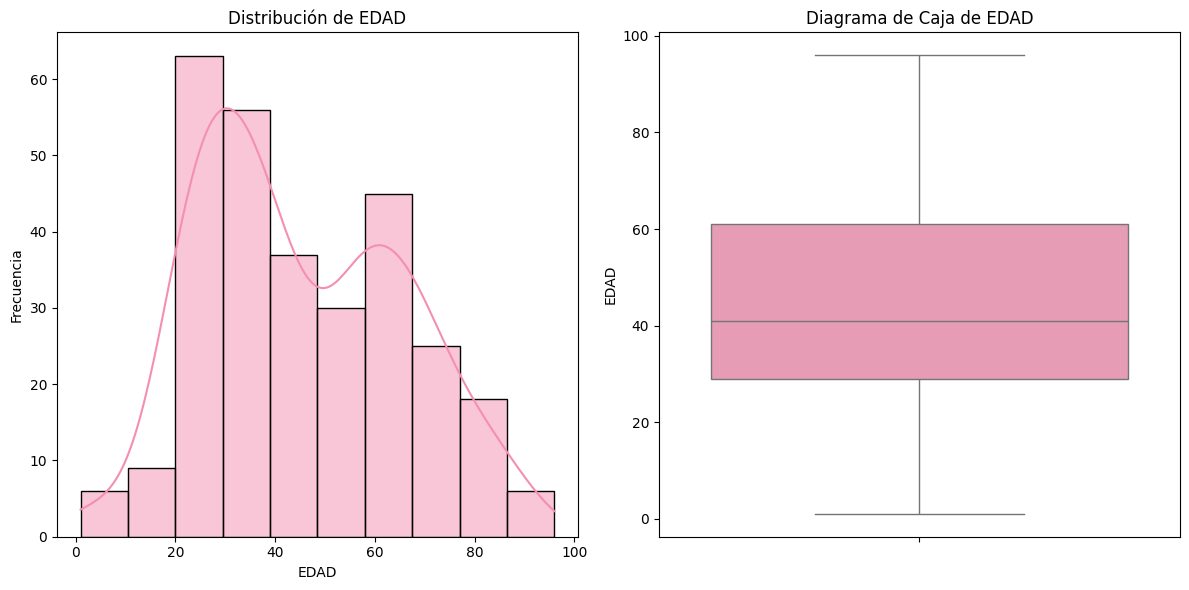

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Colores asignados por columna
colores = {
    'SEMANA': '#B39DDB',   # lila
    'AÑO': '#81D4FA',      # celeste
    'EDAD': '#F48FB1'      # rosado
}

numerical_cols = ['SEMANA', 'AÑO', 'EDAD']

for col in numerical_cols:
    plt.figure(figsize=(12, 6))
    color = colores[col]

    # Histograma
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color=color)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

    # Diagrama de caja
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[col], color=color)
    plt.title(f'Diagrama de Caja de {col}')
    plt.ylabel(col)

    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd

# Columnas numéricas
numerical_cols = ['SEMANA', 'AÑO', 'EDAD']

# Crear una copia del DataFrame original
df_cleaned = df.copy()

# Aplicar el método IQR para eliminar outliers por columna
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Filtrar valores dentro del rango permitido
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Eliminar los datos atípicos (outliers)
    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

# Mostrar resultado
print("DataFrame limpio sin outliers:")
print(df_cleaned.head())


DataFrame limpio sin outliers:
   CODIGO EVENTO  SEMANA   AÑO  EDAD UNIDAD MEDIDA EDAD    GENERO  \
0            820      51  2022    64              MESES  FEMENINO   
1            820       6  2022    67               AÑOS  FEMENINO   
2            820      31  2022    42               AÑOS  FEMENINO   
3            820       5  2022    62               AÑOS  FEMENINO   
4            820       3  2022    63               AÑOS  FEMENINO   

  TIPO SEGURIDAD SOCIAL          NOMBRE EVENTO DEPARTAMENTO DE RESIDENCIA  \
0          CONTRIBUTIVO  TUBERCULOSIS PULMONAR                  RISARALDA   
1          CONTRIBUTIVO  TUBERCULOSIS PULMONAR                  RISARALDA   
2            SUBSIDIADO  TUBERCULOSIS PULMONAR                  RISARALDA   
3            SUBSIDIADO  TUBERCULOSIS PULMONAR                  RISARALDA   
4            SUBSIDIADO  TUBERCULOSIS PULMONAR                  RISARALDA   

  MUNICIPIO DE RESIDENCIA  ESTRATO NACIONALIDAD  
0                 PEREIRA      2.0     CO


📊 Análisis de normalidad para: CODIGO EVENTO
Shapiro-Wilk -> Estadístico: 1.0000, p-valor: 1.0000
Kolmogorov-Smirnov -> Estadístico: nan, p-valor: nan
Anderson-Darling -> Estadístico: nan
  Nivel 15.0% -> Valor crítico: 0.5680
  Nivel 10.0% -> Valor crítico: 0.6470
  Nivel 5.0% -> Valor crítico: 0.7770
  Nivel 2.5% -> Valor crítico: 0.9060
  Nivel 1.0% -> Valor crítico: 1.0780
Jarque-Bera -> Estadístico: nan, p-valor: nan


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:579: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_distn_infrastructure.py:2148: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)
/usr/local/lib/python3.11/dist-packages/scipy/stats/_morestats.py:2263: RuntimeWarning: invalid value encountered in divide
  w = (y - xbar) / s


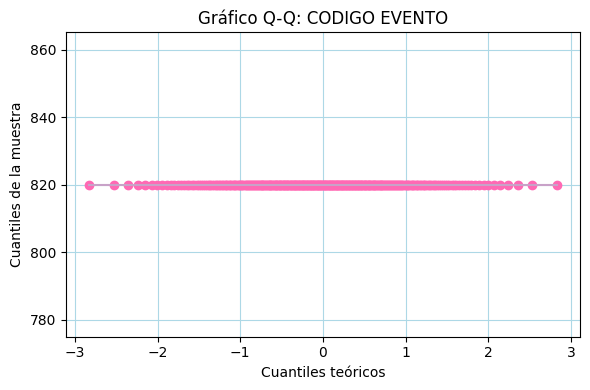


📊 Análisis de normalidad para: SEMANA
Shapiro-Wilk -> Estadístico: 0.9677, p-valor: 0.0000
Kolmogorov-Smirnov -> Estadístico: 0.0644, p-valor: 0.1656
Anderson-Darling -> Estadístico: 1.9159
  Nivel 15.0% -> Valor crítico: 0.5680
  Nivel 10.0% -> Valor crítico: 0.6470
  Nivel 5.0% -> Valor crítico: 0.7770
  Nivel 2.5% -> Valor crítico: 0.9060
  Nivel 1.0% -> Valor crítico: 1.0780
Jarque-Bera -> Estadístico: 12.1511, p-valor: 0.0023


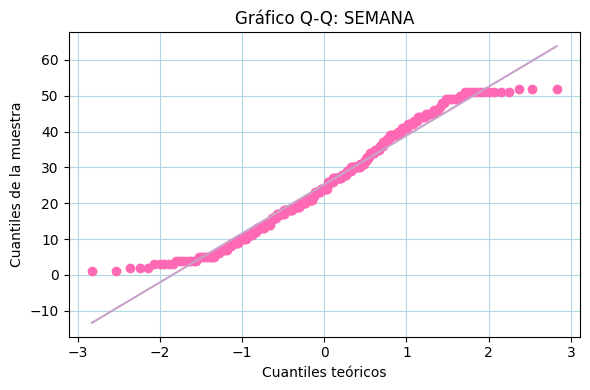


📊 Análisis de normalidad para: AÑO
Shapiro-Wilk -> Estadístico: 1.0000, p-valor: 1.0000
Kolmogorov-Smirnov -> Estadístico: nan, p-valor: nan
Anderson-Darling -> Estadístico: nan
  Nivel 15.0% -> Valor crítico: 0.5680
  Nivel 10.0% -> Valor crítico: 0.6470
  Nivel 5.0% -> Valor crítico: 0.7770
  Nivel 2.5% -> Valor crítico: 0.9060
  Nivel 1.0% -> Valor crítico: 1.0780
Jarque-Bera -> Estadístico: nan, p-valor: nan


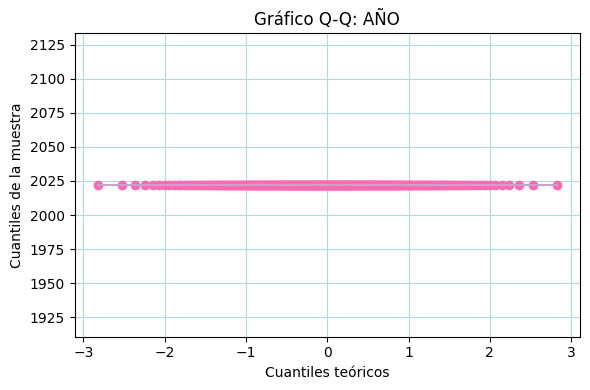


📊 Análisis de normalidad para: EDAD
Shapiro-Wilk -> Estadístico: 0.9662, p-valor: 0.0000
Kolmogorov-Smirnov -> Estadístico: 0.0970, p-valor: 0.0072
Anderson-Darling -> Estadístico: 3.9278
  Nivel 15.0% -> Valor crítico: 0.5680
  Nivel 10.0% -> Valor crítico: 0.6470
  Nivel 5.0% -> Valor crítico: 0.7770
  Nivel 2.5% -> Valor crítico: 0.9060
  Nivel 1.0% -> Valor crítico: 1.0780
Jarque-Bera -> Estadístico: 12.4451, p-valor: 0.0020


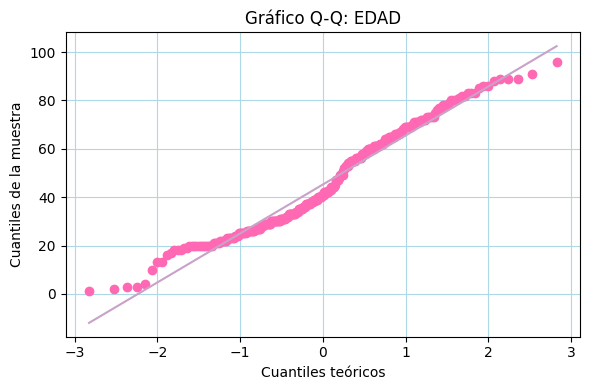


📊 Análisis de normalidad para: ESTRATO
Shapiro-Wilk -> Estadístico: 0.8577, p-valor: 0.0000
Kolmogorov-Smirnov -> Estadístico: 0.1906, p-valor: 0.0000
Anderson-Darling -> Estadístico: 15.4564
  Nivel 15.0% -> Valor crítico: 0.5680
  Nivel 10.0% -> Valor crítico: 0.6470
  Nivel 5.0% -> Valor crítico: 0.7770
  Nivel 2.5% -> Valor crítico: 0.9060
  Nivel 1.0% -> Valor crítico: 1.0780
Jarque-Bera -> Estadístico: 19.7740, p-valor: 0.0001


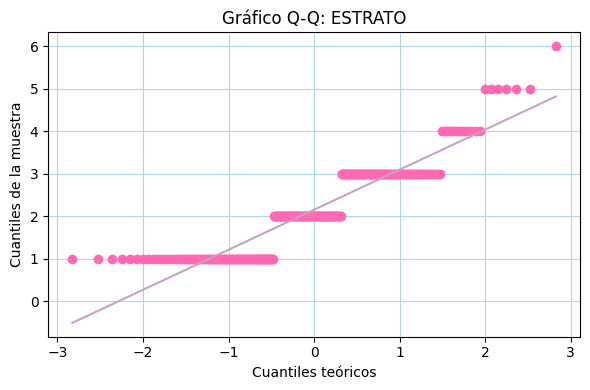

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import shapiro, kstest, anderson, jarque_bera, probplot

# Leer archivo CSV
archivo = "Casos_de_tuberculosis_pulmonar_20250804.csv"
df = pd.read_csv(archivo)

# Detectar columnas numéricas
variables_numericas = df.select_dtypes(include=['number']).columns

# Recorrer cada variable numérica
for var in variables_numericas:
    data = df[var].dropna()

    print(f"\n📊 Análisis de normalidad para: {var}")

    # 1. Shapiro-Wilk
    shapiro_stat, shapiro_p = shapiro(data)
    print(f"Shapiro-Wilk -> Estadístico: {shapiro_stat:.4f}, p-valor: {shapiro_p:.4f}")

    # 2. Kolmogorov-Smirnov
    ks_stat, ks_p = kstest(data, 'norm', args=(data.mean(), data.std()))
    print(f"Kolmogorov-Smirnov -> Estadístico: {ks_stat:.4f}, p-valor: {ks_p:.4f}")

    # 3. Anderson-Darling
    ad_result = anderson(data, dist='norm')
    print(f"Anderson-Darling -> Estadístico: {ad_result.statistic:.4f}")
    for i in range(len(ad_result.critical_values)):
        nivel = ad_result.significance_level[i]
        critico = ad_result.critical_values[i]
        print(f"  Nivel {nivel}% -> Valor crítico: {critico:.4f}")

    # 4. Jarque-Bera
    jb_stat, jb_p = jarque_bera(data)
    print(f"Jarque-Bera -> Estadístico: {jb_stat:.4f}, p-valor: {jb_p:.4f}")

    # 📈 Gráfico Q-Q personalizado
    plt.figure(figsize=(6, 4))
    ax = plt.gca()
    probplot(data, dist="norm", plot=ax)

    # Personalizar colores (rosado, lila, celeste)
    ax.get_lines()[0].set_markerfacecolor('#FF69B4')  # rosado
    ax.get_lines()[0].set_markeredgecolor('#FF69B4')
    ax.get_lines()[1].set_color('#C8A2C8')  # lila
    plt.grid(True, color='#ADD8E6')  # celeste

    plt.title(f"Gráfico Q-Q: {var}")
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles de la muestra")
    plt.tight_layout()
    plt.show()
